# GRIP SEPT 2021 BATCH

## Name: Akshata Dattu Sonawane

## Problem Statement: Predict the percentage of a student based on the no. of study hours. What will be the predicted score if a student studies for 9.25 hrs/day?


## Importing Libraries to be Used:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Dataset:

In [2]:
data = pd.read_csv("http://bit.ly/w-data")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.shape

(25, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
print(data.mean())

Hours      5.012
Scores    51.480
dtype: float64


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Result and Features needed to be Seperated:

In [10]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [12]:
x.shape

(25, 1)

In [13]:
y.shape

(25,)

## Visualization of the Data:

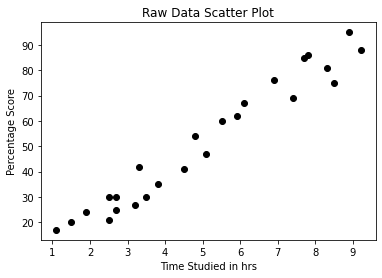

In [30]:
# Plotting the distribution of scores:
plt.scatter(x,y,color = "Black") # scatter plot
plt.title("Raw Data Scatter Plot")
plt.xlabel("Time Studied in hrs")
plt.ylabel("Percentage Score")
plt.show();

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [16]:
# For data modelling, I will be using scikit learn library.
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(20, 1) (20,)
(5, 1) (5,)


## Training Model:
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [18]:
from sklearn.linear_model import LinearRegression

In [25]:
linModel = LinearRegression()
linModel.fit(X_train, Y_train)
print(f'Coefficient : {linModel.coef_}\nIntercept : {linModel.intercept_}\nAccuracy : {round(linModel.score(X_test,Y_test),4)*100}%')

Coefficient : [9.91065648]
Intercept : 2.018160041434683
Accuracy : 94.55%


## Prediction:

In [27]:
predictions = linModel.predict(X_test)
data_predicted = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions}) 
data_predicted

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


As we can see from the "data_predicted" data, the Actual Column data is somewhat similar to the Predicted Column Values.



## Plotting Linear Regression line:

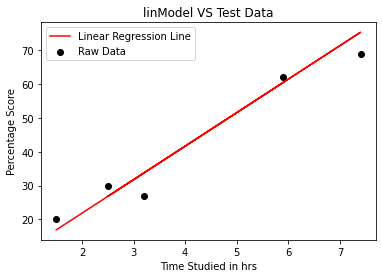

In [34]:
plt.plot(X_test, predictions,'red', label = 'Linear Regression Line')
plt.scatter(X_test, Y_test, label = "Raw Data",color="Black")
plt.title('linModel VS Test Data')
plt.xlabel("Time Studied in hrs")
plt.ylabel("Percentage Score")
plt.legend()
plt.show()

## Plotting Linear Regression Line with Whole Dataset:

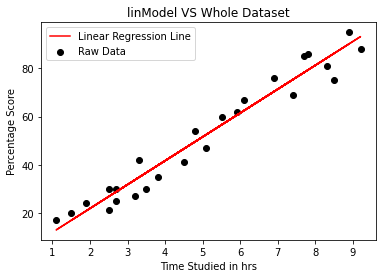

In [33]:
l = (linModel.coef_ * x) + linModel.intercept_
plt.scatter(x,y, label = "Raw Data", color = "Black")
plt.plot(x, l , 'red', label = "Linear Regression Line")
plt.title("linModel VS Whole Dataset")
plt.xlabel("Time Studied in hrs")
plt.ylabel("Percentage Score")
plt.legend()
plt.show();

## After Analysis of raw as well as whole data and doing it visually:
#### What will be the predicted score if a student studies for 9.25 hrs/day?

In [36]:
hrs = float(input("Hours Studied per day: "))
hrs = np.reshape(hrs,(-1,1))
predicted = linModel.predict(hrs)
print(f'Predicted Score: {float(predicted[0])} %')
print(f'Rounded Predicted Score: {round(predicted[0],4)} %')

Hours Studied per day: 9.25
Predicted Score: 93.69173248737538 %
Rounded Predicted Score: 93.6917 %


In [37]:
from sklearn import metrics
print(f'Mean Absolute Error: {metrics.mean_absolute_error(Y_test, predictions)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(Y_test, predictions)}')

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174


I have calculated two errors in Metrics i.e. Mean Absolute Error and Mean Squared Error. 

## Conclusion:

### I have sucessfully predicted score is to be 93.69%, if student studies for 9.25 hrs/day.

### Thank You!